<a href="https://colab.research.google.com/github/nayiarmiharbi/ColabG/blob/main/TensorFlow_Begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


## Breast Cancer Data reading from UC Irvine

[Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [3]:
import pandas as pd
from google.colab import files


uploaded = files.upload()
df = pd.read_csv('wdbc.data', header=None)

# df.head()
# df.info()
# df.describe()

df.columns = [
    'ID', 'Diagnosis',
    'radius1', 'texture1', 'perimeter1', 'area1',
    'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
    'radius2', 'texture2', 'perimeter2', 'area2',
    'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3',
    'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
    ]  # Modify according to your dataset

Saving wdbc.data to wdbc.data


In [4]:
from google.colab import data_table # interactive tables
data_table.enable_dataframe_formatter()

In [5]:
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preprocessing the Data
### Train-Test-Validation Split
 |Train|validation|Test|
 |-:|:-|-:|
 |60%|20%|20%|


using Scikit Learn Train Test Split


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID', 'Diagnosis'], axis=1)  # Features
y = df['Diagnosis']                      # Labels

# First split: Train vs Temp (Temp will be split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Second split: Validation vs Test (from Temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [7]:
# To Ensure labels y_train, y_val, and y_test are in numeric form — for binary classification (0 and 1):

y_train = (y_train == 'M').astype(int)
y_val = (y_val == 'M').astype(int)
y_test = (y_test == 'M').astype(int)

## using Neural Networks
|Input|Layer 1|layer 2|Layer 3|Output layer|
|-|-|-|-|-|
|30|16|8|6|1|
|Activation|ReLU|ReLU|ReLU|Sigmoid|


In [13]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # ANN

classifier.add(Dense(units=16, activation='relu', input_dim=30))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# After Definition of the NN specify the Optimizer and the loss function
# classifier.compile(optimizer='rmsprop', loss='binary_crossentropy')
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # to plot accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the model
Using `.fit()` with the validation set:
 - `epochs=50` → how many times to iterate
 - `batch_size=32` → how many samples per batch
 - `validation_data` → used for validation loss/accuracy monitoring

In [14]:
history = classifier.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.3857 - loss: 18.5007 - val_accuracy: 0.3772 - val_loss: 5.6839
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4069 - loss: 4.6962 - val_accuracy: 0.3860 - val_loss: 1.5661
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4311 - loss: 1.2131 - val_accuracy: 0.8421 - val_loss: 0.5151
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8436 - loss: 0.5631 - val_accuracy: 0.8246 - val_loss: 0.5659
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7966 - loss: 0.6005 - val_accuracy: 0.8158 - val_loss: 0.5694
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7853 - loss: 0.6086 - val_accuracy: 0.8246 - val_loss: 0.5601
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7843 - loss: 0.5981 - val_accuracy: 0.8333 - val_loss: 0.5480
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8392 - loss: 0.5851 - val_accuracy: 0.8684 - v

In [15]:
test_loss = classifier.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8944 - loss: 0.3805 
Test Loss: [0.386729896068573, 0.8947368264198303]


In [16]:
y_pred_prob = classifier.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


### to Check Accuracy

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8947368421052632
Confusion Matrix:
 [[70  2]
 [10 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        72
           1       0.94      0.76      0.84        42

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



### to Plot Accuracy

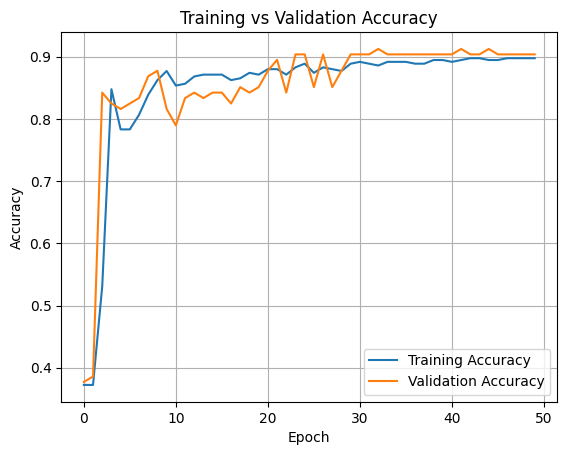

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


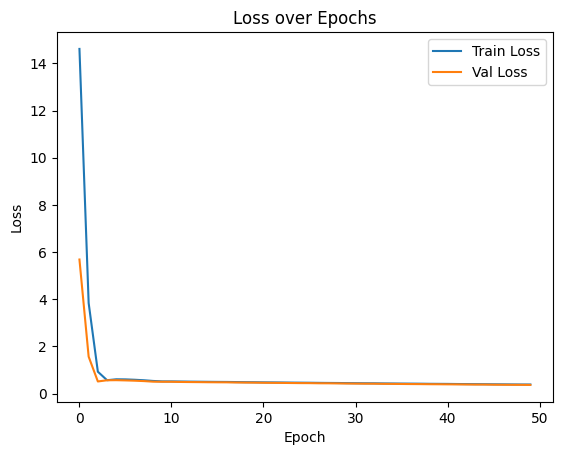

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
